openCV 之 undistort   （參數之單位由 mm 改成 pixel）

（openCV畸變差參數是由原始影像轉換至畸變影像之參數）

（但看來實習的參數是由畸變影像轉換至原始影像之參數） 

所以看來是使畸變加劇

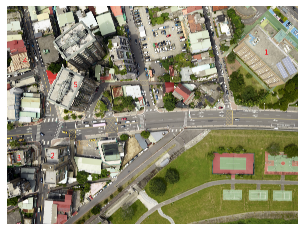

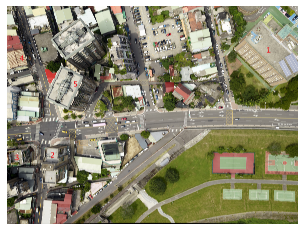

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

f=55.314
Pw=8280
Ph=6208
Fw=43.884
Fh=32.902
k1=-3.46e-5
k2=-1.15e-7
k3=0
p1=-4.28e-7
p2=9.77e-5

def mmPix(Lk_i,Ln):
  for k_i,n in zip(Lk_i,Ln):
    Pk_i=k_i*(Pw/Fw)**(n-1)
    for i,item in enumerate(Lk_i):
      if item==k_i:
        Lk_i[i]=Pk_i
  return Lk_i
fx=f*Pw/Fw
fy=f*Ph/Fh
cx=4172.162
cy=3093.761
b = [[fx,0,cx],[0,fy,cy],[0,0,1]]
mtx= np.array(b)
# Load coefficients
dist =np.array(mmPix([k1,k2,p2,p1,k3],[2,4,2,2,6]))
original = cv2.imread('/content/drive/MyDrive/Colab Notebooks/distortion/image.jpg')
dst = cv2.undistort(original, mtx, dist, None, None)
#cv2.imwrite('/content/undist.jpg', dst)
#cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/distortion/undist.jpg', dst)

plt.axis('off')
plt.figure(1)
plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
plt.figure(2)
plt.axis('off')
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

openCV 之 remap 參數單位 mm   套用實習說明的畸變差公式

(openCV產生一由原始影像映射至畸變影像之矩陣 再將實際畸變影像的像素與矩陣內插，回推其在原始影像的位置）

（定義跟openCV是反過來的 所以remap的結果也使畸變差加劇）

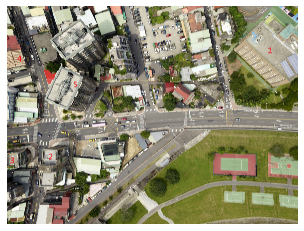

In [ ]:
img=cv2.imread('/content/drive/MyDrive/Colab Notebooks/distortion/image.jpg')
Pw=8280
Ph=6208
cx=4172.162
cy=3093.761
x,y = np.meshgrid(np.float32(np.arange(Pw)),np.float32(np.arange(Ph)))
x=(x-cx)*Fw/Pw
y=-(y-cy)*Fh/Ph
r = np.sqrt(x**2 + y**2)
x_c=x*(1+k1*r**2+k2*r**4+k3*r**6)+2*p2*x*y+p1*(r**2+2*x**2)
y_c=y*(1+k1*r**2+k2*r**4+k3*r**6)+2*p1*x*y+p2*(r**2+2*y**2)
x=x_c/Fw*Pw+cx
y=-y_c/Fh*Ph+cy
dst = cv2.remap(original, x, y, cv2.INTER_LINEAR)
plt.axis('off')
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

同上 但公式以畸變差甚小來反推 應較接近openCV的畸變公式

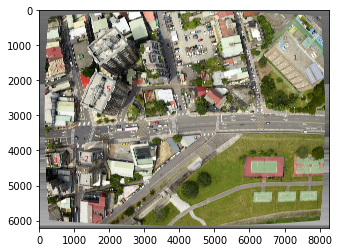

In [ ]:
img=cv2.imread('/content/drive/MyDrive/Colab Notebooks/distortion/image.jpg')
Pw=8280
Ph=6208
cx=4172.162
cy=3093.761
x,y = np.meshgrid(np.float32(np.arange(Pw)),np.float32(np.arange(Ph)))
x=(x-cx)*Fw/Pw
y=-(y-cy)*Fh/Ph
r = np.sqrt(x**2 + y**2)
x_c=x*(-1+k1*r**2+k2*r**4+k3*r**6)+2*p2*x*y+p1*(r**2+2*x**2)
y_c=y*(-1+k1*r**2+k2*r**4+k3*r**6)+2*p1*x*y+p2*(r**2+2*y**2)
x=-x_c/Fw*Pw+cx
y=y_c/Fh*Ph+cy
undistorted_m=cv2.remap(img, x, y, interpolation=cv2.INTER_LINEAR, borderValue= 0, borderMode=cv2.BORDER_TRANSPARENT) 
cv2.imwrite('/content/undist_m.jpg', undistorted_m)
cv2.imwrite('/content/drive/MyDrive/Colab Notebooks/distortion/undist_m.jpg', undistorted_m)
plt.imshow(cv2.cvtColor(undistorted_m, cv2.COLOR_BGR2RGB))

scipy 產生一具畸變之棋盤圖像 

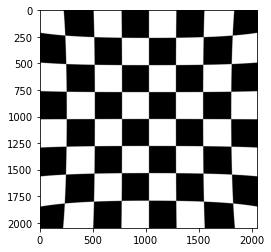

In [ ]:
import scipy.ndimage
csb=cv2.imread('/content/drive/MyDrive/Colab Notebooks/distortion/Chess_Board.svg',0)
Pw,Ph,cx,cy=[2048,2048,1023,1027]
x,y = np.meshgrid(np.float32(np.arange(Pw)),np.float32(np.arange(Ph)))
x=(x-cx)*Fw/Pw
y=-(y-cy)*Fh/Ph
r = np.sqrt(x**2 + y**2)
k1=-3.46e-5
k2=-1.15e-7
k3=0
p1=-4.28e-7
p2=9.77e-5
x_c=x*(1+k1*r**2+k2*r**4+k3*r**6)+2*p2*x*y+p1*(r**2+2*x**2)
y_c=y*(1+k1*r**2+k2*r**4+k3*r**6)+2*p1*x*y+p2*(r**2+2*y**2)
x=x_c/Fw*Pw+cx
y=-y_c/Fh*Ph+cy
distorted = scipy.ndimage.map_coordinates(csb, np.array([y.ravel(),x.ravel()]))
distorted.resize([2048,2048])
cv2.imwrite('/content/dist.jpg', distorted)
plt.imshow(cv2.cvtColor(distorted, cv2.COLOR_BGR2RGB))

類似上上個的方法  試圖改正前圖  效果還行

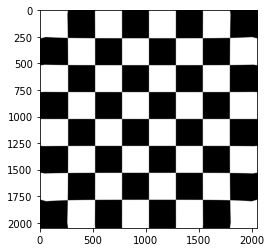

In [ ]:
Pw,Ph,cx,cy=[2048,2048,1023,1027]
x,y = np.meshgrid(np.float32(np.arange(Pw)),np.float32(np.arange(Ph)))
x=(x-cx)*Fw/Pw
y=-(y-cy)*Fh/Ph
r = np.sqrt(x**2 + y**2)
x_c=x*(-1+k1*r**2+k2*r**4+k3*r**6)+2*p2*x*y+p1*(r**2+2*x**2)
y_c=y*(-1+k1*r**2+k2*r**4+k3*r**6)+2*p1*x*y+p2*(r**2+2*y**2)

x=-x_c/Fw*Pw+cx
y=y_c/Fh*Ph+cy
backward=cv2.remap(distorted, x, y, interpolation=cv2.INTER_LINEAR, borderValue= 0, borderMode=cv2.BORDER_REFLECT) 
plt.imshow(cv2.cvtColor(backward, cv2.COLOR_BGR2RGB))

scipy  利用畸變差甚小時之近似 消除棋盤之畸變差

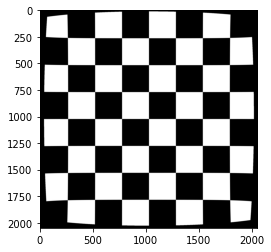

In [ ]:
import scipy.ndimage
Pw,Ph,cx,cy=[2048,2048,1023,1027]
x,y = np.meshgrid(np.float32(np.arange(Pw)),np.float32(np.arange(Ph)))
x=(x-cx)*Fw/Pw
y=-(y-cy)*Fh/Ph
r = np.sqrt(x**2 + y**2)
k1=-3.46e-5
k2=-1.15e-7
k3=0
p1=-4.28e-7
p2=9.77e-5
x_c=x*(-1+k1*r**2+k2*r**4+k3*r**6)+2*p2*x*y+p1*(r**2+2*x**2)
y_c=y*(-1+k1*r**2+k2*r**4+k3*r**6)+2*p1*x*y+p2*(r**2+2*y**2)
x=-x_c/Fw*Pw+cx
y=y_c/Fh*Ph+cy
csb_undist = scipy.ndimage.map_coordinates(distorted, np.array([y.ravel(),x.ravel()]))
csb_undist.resize([2048,2048])
#cv2.imwrite('/content/dist.jpg', distorted)
plt.imshow(cv2.cvtColor(csb_undist, cv2.COLOR_BGR2RGB))

反過來變形 再嘗試改正

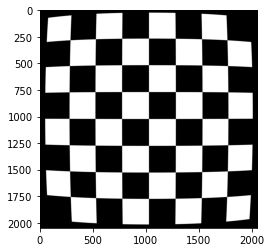

In [ ]:
import scipy.ndimage
csb=cv2.imread('/content/drive/MyDrive/Colab Notebooks/distortion/Chess_Board.svg',0)
Pw,Ph,cx,cy=[2048,2048,1023,1027]
x,y = np.meshgrid(np.float32(np.arange(Pw)),np.float32(np.arange(Ph)))
x=(x-cx)*Fw/Pw
y=-(y-cy)*Fh/Ph
r = np.sqrt(x**2 + y**2)
k1=-3.46e-5
k2=-1.15e-7
k3=0
p1=-4.28e-7
p2=9.77e-5
x_c=x*(-1+k1*r**2+k2*r**4+k3*r**6)+2*p2*x*y+p1*(r**2+2*x**2)
y_c=y*(-1+k1*r**2+k2*r**4+k3*r**6)+2*p1*x*y+p2*(r**2+2*y**2)
x=-x_c/Fw*Pw+cx
y=y_c/Fh*Ph+cy
ndistorted = scipy.ndimage.map_coordinates(csb, np.array([y.ravel(),x.ravel()]))
ndistorted.resize([2048,2048])
#cv2.imwrite('/content/dist.jpg', distorted)
plt.imshow(cv2.cvtColor(ndistorted, cv2.COLOR_BGR2RGB))

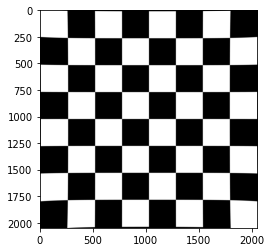

In [ ]:
Pw,Ph,cx,cy=[2048,2048,1023,1027]
x,y = np.meshgrid(np.float32(np.arange(Pw)),np.float32(np.arange(Ph)))
x=(x-cx)*Fw/Pw
y=-(y-cy)*Fh/Ph
r = np.sqrt(x**2 + y**2)
k1=-3.46e-5
k2=-1.15e-7
k3=0
p1=-4.28e-7
p2=9.77e-5
x_c=x*(1+k1*r**2+k2*r**4+k3*r**6)+2*p2*x*y+p1*(r**2+2*x**2)
y_c=y*(1+k1*r**2+k2*r**4+k3*r**6)+2*p1*x*y+p2*(r**2+2*y**2)
x=x_c/Fw*Pw+cx
y=-y_c/Fh*Ph+cy
csb_ndist = scipy.ndimage.map_coordinates(ndistorted, np.array([y.ravel(),x.ravel()]))
csb_ndist.resize([2048,2048])
#cv2.imwrite('/content/dist.jpg', distorted)
plt.imshow(cv2.cvtColor(csb_ndist, cv2.COLOR_BGR2RGB))

土法煉鋼  結果沒問題 但要跑hen久

True

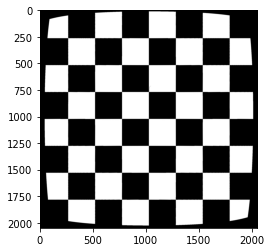

In [ ]:
Fw=43.884
Fh=32.902
Pw,Ph,cx,cy=[2048,2048,1023,1027]
k1=-3.46e-5
k2=-1.15e-7
k3=0
p1=-4.28e-7
p2=9.77e-5
csb_dis=cv2.imread('/content/dist.jpg',0)
new_img=np.zeros((Ph,Pw,3), np.uint8)
for y in range(Ph):
    for x in range(Pw):
        x1=(x-cx)*Fw/Pw
        y1=-(y-cy)*Fh/Ph
        r=(x1**2+y1**2)**0.5
        x_c = x1*(1+k1*r**2+k2*r**4+k3*r**6)+2*p2*x1*y1+p1*(r**2+2*x1**2)
        y_c = y1*(1+k1*r**2+k2*r**4+k3*r**6)+2*p1*x1*y1+p2*(r**2+2*y1**2)
        xC=x_c/Fw*Pw+cx
        yC=-y_c/Fh*Ph+cy
        new_img[int(yC) , int(xC) ] = csb_dis[int(y), int(x)]
plt.imshow(new_img)
cv2.imwrite('/content/真 undist.jpg', new_img)

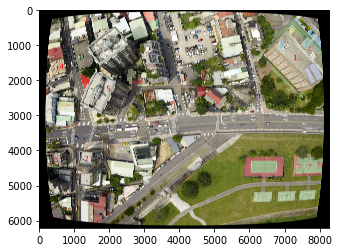

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
distorted_ori= cv2.imread('/content/drive/MyDrive/Colab Notebooks/distortion/image.jpg')

Pw=8280
Ph=6208
Fw=43.884
Fh=32.902
k1=-3.46e-5
k2=-1.15e-7
k3=0
p1=-4.28e-7
p2=9.77e-5
cx=4172.162
cy=3093.761

new_img=np.zeros((Ph,Pw,3), np.uint8)
for y in range(Ph):
    for x in range(Pw):
        x1=(x-cx)*Fw/Pw
        y1=-(y-cy)*Fh/Ph
        r=(x1**2+y1**2)**0.5
        x_c = x1*(1+k1*r**2+k2*r**4+k3*r**6)+2*p2*x1*y1+p1*(r**2+2*x1**2)
        y_c = y1*(1+k1*r**2+k2*r**4+k3*r**6)+2*p1*x1*y1+p2*(r**2+2*y1**2)
        xC=x_c/Fw*Pw+cx
        yC=-y_c/Fh*Ph+cy
        new_img[int(yC) , int(xC) ] = distorted_ori[int(y), int(x)]
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
#cv2.imwrite('/content/真 undist.jpg', new_img)

從 int 改成 round 看來沒什麼差

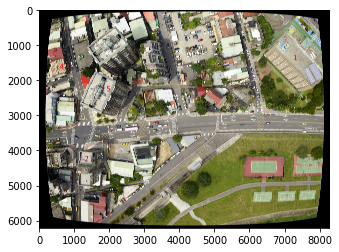

In [ ]:
from skimage import io
import numpy as np
import cv2
from matplotlib import pyplot as plt
distorted_ori= io.imread('/content/drive/MyDrive/Colab Notebooks/distortion/image.jpg')

Pw=8280
Ph=6208
Fw=43.884
Fh=32.902
k1=-3.46e-5
k2=-1.15e-7
k3=0
p1=-4.28e-7
p2=9.77e-5
cx=4172.162
cy=3093.761

new_img=np.zeros((Ph,Pw,3), np.uint8)

for y in range(Ph):
    for x in range(Pw):
        x1=(x-cx)*Fw/Pw
        y1=-(y-cy)*Fh/Ph
        r=(x1**2+y1**2)**0.5
        x_c = x1*(1+k1*r**2+k2*r**4+k3*r**6)+2*p2*x1*y1+p1*(r**2+2*x1**2)
        y_c = y1*(1+k1*r**2+k2*r**4+k3*r**6)+2*p1*x1*y1+p2*(r**2+2*y1**2)
        xC=x_c/Fw*Pw+cx
        yC=-y_c/Fh*Ph+cy
        new_img[round(yC) , round(xC) ] = distorted_ori[int(y), int(x)]
plt.imshow(new_img)

只有三個像素不同

In [ ]:
import numpy as np
import cv2
ori= cv2.imread('/content/drive/MyDrive/Colab Notebooks/distortion/真 undist.jpg')
new_img= cv2.imread('/content/drive/MyDrive/Colab Notebooks/distortion/真 undist-1.jpg')
np.nonzero(new_img-ori)

(array([  31,   31,   31, ..., 6144, 6144, 6144]),
 array([3200, 3201, 3202, ..., 5000, 5022, 5034]),
 array([1, 1, 1, ..., 0, 2, 0]))

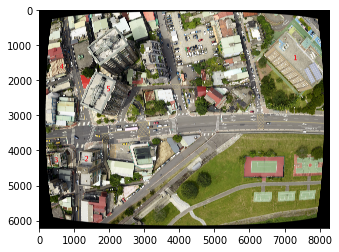

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
distorted_ori= cv2.imread('/content/drive/MyDrive/Colab Notebooks/distortion/image.jpg')

Pw=8280
Ph=6208
Fw=43.884
Fh=32.902
k1=-3.46e-5
k2=-1.15e-7
k3=0
p1=-4.28e-7
p2=9.77e-5
cx=4172.162
cy=3093.761

new_img=np.zeros((Ph,Pw,3), np.uint8)
#for x, y in np.nditer(distorted_ori):
def dist_ref(x,y):
        x1=(x-cx)*Fw/Pw
        y1=-(y-cy)*Fh/Ph
        r2=x1**2+y1**2
        x_c = x1*(1+k1*r2+k2*r2**2+k3*r2**3)+2*p2*x1*y1+p1*(r2+2*x1**2)
        y_c = y1*(1+k1*r2+k2*r2**2+k3*r2**3)+2*p1*x1*y1+p2*(r2+2*y1**2)
        xC=x_c/Fw*Pw+cx
        yC=-y_c/Fh*Ph+cy
        return xC,yC
for y in range(Ph):
    for x in range(Pw):
        xC,yC=dist_ref(x,y)
        new_img[round(yC) , round(xC) ] = distorted_ori[int(y), int(x)]
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))

True

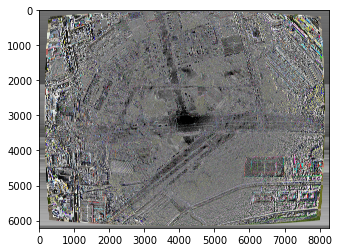

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
ori= cv2.imread('/content/drive/MyDrive/Colab Notebooks/distortion/undist_m.jpg')
new_img= cv2.imread('/content/drive/MyDrive/Colab Notebooks/distortion/真 undist-1.jpg')
plt.imshow(cv2.cvtColor(ori-new_img, cv2.COLOR_BGR2RGB))
cv2.imwrite('/content/diff.jpg', ori-new_img)

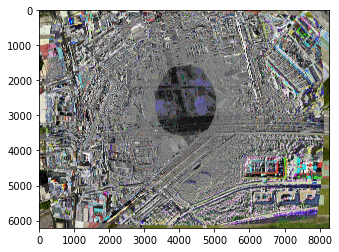

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
ori= cv2.imread('/content/drive/MyDrive/Colab Notebooks/distortion/image.jpg')
new_img= cv2.imread('/content/drive/MyDrive/Colab Notebooks/distortion/真 undist-1.jpg')
plt.imshow(cv2.cvtColor(ori-new_img, cv2.COLOR_BGR2RGB))
#cv2.imwrite('/content/diff.jpg', ori-new_img)